### Filter Feature Selection Methods


Two essentail types of feature selection

Univariate --  treat each feature individually and independently of the feature space. This is how it functions in practice:
It ranks features according to certain criteria.
Then select the highest ranking features according to those criteria.
One problem that can occur with univariate methods is they may select a redundant variable, as they don’t take into consideration the relationship between features.

Multivariate -- evaluate the entire feature space. They take into account features in relation to other ones in the dataset.
These methods are able to handle duplicated, redundant, and correlated features.

--------------Actual Methods------------------

Basic Methods -- Remove columns that are either constant,quasi constant, or duplicates
// Test what happens if we choose a single column with the largest variance from each octate

Correlation -- use a single column from a range of columns that are correlated to an extent

    Pearson Correlation
    Kendall Correlation
    Spearman Rank Coefficient
    
Statistical and Ranking Filter Methods -- tests that evaluate each feature individually. By shedding light on the target, they evaluate whether the variable is important in order to discriminate against the target.

    Mutual Information -- measures the amount of information obtained about one variable through observing the other variable
    Chi squared Test
    ANOVA Univariate Test
    
Univariate ROC-AUC /RMSE -- Build a decision tree using a single variable and a target, rank features according to the ROC-AUC or RMSE, Select features with the highest ranking score

(Can we use a decision tree to see what columns create the largest divisions high up in the tree?)


What we have done so far:

Basic Method --We have already tried some of the basic methods and noticed that grouping columns by their respective octate group greatly reduces the column count while preseving the accuracy

Different Correlation Methods -- We have tried using various correlation and rank coefficients to test which columns are correlated with what

Statistical and Ranking Filter Methods -- isn't this essentialyl same as correlation methods?

Univariate ROC-AUC / RMSE: Will work on this one

What is ROC-AUC ? - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.


Essentially -- this is just a fancy way of figruing out how many columns we need (although we might want to do this or something similar sometime later!!!)

What's more interesting is the Decision Tree approach. 

In [2]:
##Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_filepath = "../data/UmeaSiblingBundlingMLDistances.csv"

all_data = pd.read_csv(data_filepath)

data = all_data.iloc[:,0:-2]
category = all_data.iloc[:,-2]

data.head()

,Cosine.FATHER_FORENAME,Cosine.FATHER_SURNAME,Cosine.MOTHER_FORENAME,Cosine.MOTHER_MAIDEN_SURNAME,Cosine.PARENTS_PLACE_OF_MARRIAGE,Cosine.PARENTS_DAY_OF_MARRIAGE,Cosine.PARENTS_MONTH_OF_MARRIAGE,Cosine.PARENTS_YEAR_OF_MARRIAGE,Damerau-Levenshtein.FATHER_FORENAME,Damerau-Levenshtein.FATHER_SURNAME,...,Metaphone-Levenshtein.PARENTS_MONTH_OF_MARRIAGE,Metaphone-Levenshtein.PARENTS_YEAR_OF_MARRIAGE,NYSIIS-Levenshtein.FATHER_FORENAME,NYSIIS-Levenshtein.FATHER_SURNAME,NYSIIS-Levenshtein.MOTHER_FORENAME,NYSIIS-Levenshtein.MOTHER_MAIDEN_SURNAME,NYSIIS-Levenshtein.PARENTS_PLACE_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_DAY_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_MONTH_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_YEAR_OF_MARRIAGE
0,1.000,1.000,0.867,1.000,1.0,1.000,0.784,0.738,0.800,0.875,...,0,0,0.8,0.857,0.833,0.857,0.833,0,0,0
1,0.000,0.000,0.408,0.195,0.0,0.000,0.000,0.000,0.000,0.000,...,0,0,0.0,0.000,0.000,0.000,0.000,0,0,0
2,0.883,1.000,0.855,1.000,1.0,0.784,0.000,0.738,0.833,0.875,...,0,0,0.8,0.800,0.833,0.857,1.000,0,0,0
3,0.000,0.000,0.000,0.195,0.0,0.000,0.000,0.000,0.000,0.000,...,0,0,0.0,0.000,0.000,0.000,0.000,0,0,0
4,1.000,0.707,0.893,0.939,1.0,1.000,0.784,0.738,0.800,0.800,...,0,0,0.8,0.800,0.833,0.857,1.000,0,0,0


In [8]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data,all_data.iloc[:,-2])



In [9]:
dtreeclf = DecisionTreeClassifier()

dtreeclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(258.70909090909095, 207.55636363636364, 'X[15] <= 0.25\ngini = 0.487\nsamples = 647097\nvalue = [376643, 270454]'),
 Text(228.27272727272728, 187.7890909090909, 'X[5] <= 0.392\ngini = 0.032\nsamples = 274990\nvalue = [4536, 270454]'),
 Text(197.83636363636364, 168.0218181818182, 'X[22] <= 0.4\ngini = 0.001\nsamples = 270605\nvalue = [151, 270454]'),
 Text(167.4, 148.25454545454545, 'X[12] <= 0.4\ngini = 0.0\nsamples = 270485\nvalue = [31, 270454]'),
 Text(136.96363636363637, 128.48727272727274, 'X[18] <= 0.884\ngini = 0.0\nsamples = 270461\nvalue = [7, 270454]'),
 Text(106.52727272727273, 108.72, 'gini = 0.0\nsamples = 268890\nvalue = [0, 268890]'),
 Text(167.4, 108.72, 'X[2] <= 0.838\ngini = 0.009\nsamples = 1571\nvalue = [7, 1564]'),
 Text(136.96363636363637, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(197.83636363636364, 88.95272727272729, 'X[97] <= 0.866\ngini = 0.008\nsamples = 1570\nvalue = [6, 1564]'),
 Text(121.74545454545455, 69.18545454545455, '

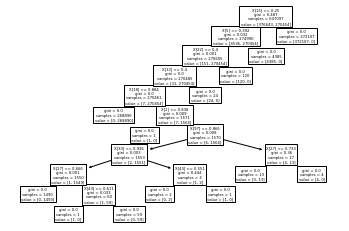

In [10]:
from sklearn import tree

tree.plot_tree(dtreeclf)

In [11]:
import graphviz
dot_data = tree.export_graphviz(dtreeclf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Dimensionality2020");

In [13]:
dot_data = tree.export_graphviz(dtreeclf, out_file=None,feature_names=data.columns,filled=True, rounded=True,special_characters=True)

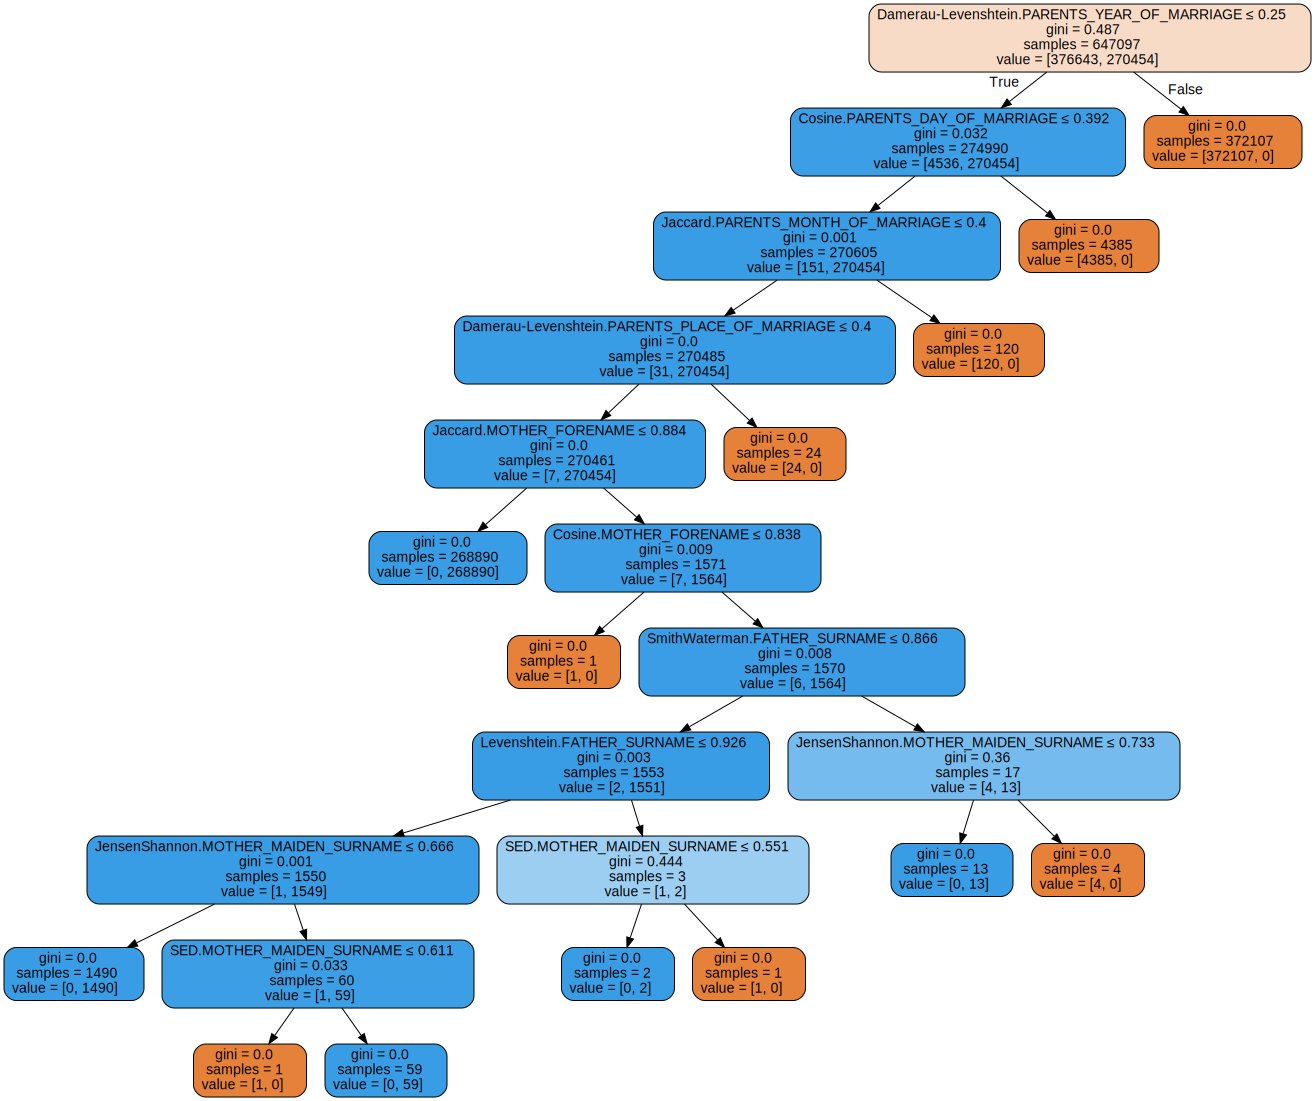

In [14]:
graph = graphviz.Source(dot_data)
graph

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtreeclf.predict(X_test))

0.9999721834593577

The above map is how the decision tree is making the decisions. If we look at the top of the tree, we can see what columns are important

#### What do the values mean?

value line in each box is telling you how many samples at that node fall into each category, in order

gini -- "impurity test" how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset
Higher gini = bad classifier

#### Analysis of the Decision Tree Classifier Trained Above

We notice that analyzing the collowing columns combined produce a gini of 0.001 (0.1% of the time, the labelled data point will be incorrect): PARENTS_YEAR_OF_MARRIAGE, PARENTS_DAY_OF_MARRIAGE, PARENTS_MONTH_OF_MARRIAGE (column ids are 

Let me test decision tree on just these columns

You can check the HD image of the first tree that states the column ids instead of the name from the "Dimensionality2020.pdf" that was generated in In[11]

In [29]:
new_data = data.loc[:,["Damerau-Levenshtein.PARENTS_YEAR_OF_MARRIAGE","Cosine.PARENTS_DAY_OF_MARRIAGE","Jaccard.PARENTS_MONTH_OF_MARRIAGE"]]

new_data.head()

,Damerau-Levenshtein.PARENTS_YEAR_OF_MARRIAGE,Cosine.PARENTS_DAY_OF_MARRIAGE,Jaccard.PARENTS_MONTH_OF_MARRIAGE
0,0.667,1.000,0.8
1,0.000,0.000,0.0
2,0.667,0.784,0.0
3,0.000,0.000,0.0
4,0.667,1.000,0.8


In [30]:
#fs for with feature selection
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(new_data,all_data.iloc[:,-2])

dtreeclf_fs = DecisionTreeClassifier()

dtreeclf_fs.fit(X_train_fs,y_train_fs)

accuracy_score(y_test_fs,dtreeclf_fs.predict(X_test_fs))

0.9999814556395719

EXTREMELY HIGH SCORE FROM JUST 3 COLUMNS!!!!!!

To what extent can we push this tactic to?



0.9997218345935771

In [32]:
new_data = data.loc[:,["Damerau-Levenshtein.PARENTS_YEAR_OF_MARRIAGE"]]

new_data.head()

#fs for with feature selection
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(new_data,all_data.iloc[:,-2])

dtreeclf_fs = DecisionTreeClassifier()

dtreeclf_fs.fit(X_train_fs,y_train_fs)

accuracy_score(y_test_fs,dtreeclf_fs.predict(X_test_fs))

0.9927862437934344

Surprised by this result. It does not seem like the classifier is overfitting as well because 1, we are only using 1 column, 2, we are separating the testing and training datasets

Does this translate over to other classifiers as well? From featureselection.ipynb:

In [36]:
from sklearn.base import clone
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression

classifiers = [RidgeClassifier(),SGDClassifier(),LogisticRegression()]

new_data = data.loc[:,["Damerau-Levenshtein.PARENTS_YEAR_OF_MARRIAGE","Cosine.PARENTS_DAY_OF_MARRIAGE","Jaccard.PARENTS_MONTH_OF_MARRIAGE"]]

X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(new_data,all_data.iloc[:,-2])

for i in range(len(classifiers)):
    classifier = clone(classifiers[i])
    classifier.fit(X_train_fs,y_train_fs)
    print(type(classifier).__name__)
    print("Feature selected with Decsion Tree: " + str(classifier.score(X_test_fs,y_test_fs)))


RidgeClassifier
Feature selected with Decsion Tree: 0.9927027941715075
SGDClassifier
Feature selected with Decsion Tree: 0.9999536390989295
LogisticRegression
Feature selected with Decsion Tree: 0.9999536390989295


Looks like it does! -- some of these classifiers have scores higher than the ones with feature selection using the top 12 columns with the most extreme coefficients that we tested in featureselection.ipynb

*Discovery:* Decision Trees are a powerful tool for feature selection. They shrinked it from 120 columns to just 3 while preserving high accuracy. Furthermore, this feature selection helped other Classifiers as well!

In our featureselection.ipynb test where we looked at what columns had the most extreme coefficients, we noticed that the top 12 columns were all different for each classifier (A). Decision Tree alone seem to single handedly carry out feature selection extremely well for these classifiers

(A) What will happen if we use top12 columns for different classifiers to carry out feature selection? -- An ensemble of topNcolumns?
//Test intersections of these top12 columns

In [37]:
def gettopNfeatures(classifier,n):
    topnindexes = []
    if(classifier.coef_.shape == (1,120)):
        coefficients = classifier.coef_[0].tolist()
    else:
        coefficients = classifier.coef_.tolist()
    
    for i in range(n):
        index = np.argmax(np.abs(coefficients))
        topnindexes.append(index)
        coefficients = coefficients[:index]+coefficients[index+1:]

    return topnindexes

In [40]:
from sklearn.base import clone
classifiers = [RidgeClassifier(),SGDClassifier(),LogisticRegression()]

top12columnlist = []

for i in range(len(classifiers)):
    classifier = clone(classifiers[i])
    
    classifier.fit(X_train,y_train)
    print(type(classifier).__name__)
    print("No feature selection: " + str(classifier.score(X_test,y_test)))
    top12features = gettopNfeatures(classifier,12)
    print("Important features:")
    print(top12features)
    
    classifier_fs = clone(classifiers[i])
    classifier_fs.fit(X_train.iloc[:,top12features],y_train)
    print("With feature selectrion: " + str(classifier_fs.score(X_test.iloc[:,top12features],y_test)))
    print("==================")
    top12columnlist.append(top12features)


RidgeClassifier
No feature selection: 0.9981362917769669
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9928928738658964
SGDClassifier
No feature selection: 0.9997728315847547
Important features:
[87, 82, 7, 22, 32, 9, 78, 28, 9, 29, 32, 12]
With feature selectrion: 0.999902642107752
LogisticRegression
No feature selection: 0.9999675473692506
Important features:
[87, 7, 22, 37, 29, 14, 42, 81, 57, 50, 97, 19]
With feature selectrion: 0.9999350947385013


In [45]:
top12columnlist


for i in range(len(top12columnlist)):
    
    
    if(i%3 == 0):
        print("Ridge top 12")
    elif(i%3 == 1):
        print("SGD top 12")
    else:
        print("Logistic Regression top 12")
        
    for ii in range(len(classifiers)):
        
        classifier = clone(classifiers[ii])
    
        classifier.fit(X_train,y_train)
        print(type(classifier).__name__)
        print("No feature selection: " + str(classifier.score(X_test,y_test)))
    
        top12features = top12columnlist[i]
        print("Important features:")
        print(top12features)
    
        classifier_fs = clone(classifiers[ii])
        classifier_fs.fit(X_train.iloc[:,top12features],y_train)
        print("With feature selectrion: " + str(classifier_fs.score(X_test.iloc[:,top12features],y_test)))
        print("==================")
    

Ridge top 12
RidgeClassifier
No feature selection: 0.9981362917769669
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9928928738658964
SGDClassifier
No feature selection: 0.9997403789540054
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9999350947385013
LogisticRegression
No feature selection: 0.9999675473692506
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9999443669187155
SGD top 12
RidgeClassifier
No feature selection: 0.9981362917769669
Important features:
[87, 82, 7, 22, 32, 9, 78, 28, 9, 29, 32, 12]
With feature selectrion: 0.9928928738658964
SGDClassifier
No feature selection: 0.9997774676748618
Important features:
[87, 82, 7, 22, 32, 9, 78, 28, 9, 29, 32, 12]
With feature selectrion: 0.9999304586483942
LogisticRegression
No feature selection: 0.9999675473692506
Important features:
[87, 82, 7, 22, 32, 9, 78, 28, 9, 29, 32, 12]
With feature sel

Looks like cross-classifier topNsignificantcolumn is a reality
What happens if we throw SVC into the list?

In [47]:
from sklearn.svm import LinearSVC
svcclassifiers = [LinearSVC(verbose=True)]

for i in range(len(svcclassifiers)):
    classifier = clone(svcclassifiers[i])
    
    classifier.fit(X_train,y_train)
    print(type(classifier).__name__)
    print("No feature selection: " + str(classifier.score(X_test,y_test)))
    top12features = gettopNfeatures(classifier,12)
    print("Important features:")
    print(top12features)
    
    classifier_fs = clone(svcclassifiers[i])
    classifier_fs.fit(X_train.iloc[:,top12features],y_train)
    print("With feature selectrion: " + str(classifier_fs.score(X_test.iloc[:,top12features],y_test)))
    print("==================")
    top12columnlist.append(top12features)

[LibLinear]LinearSVC
No feature selection: 0.9999721834593577
Important features:
[56, 90, 87, 86, 87, 7, 56, 22, 76, 14, 28, 35]
[LibLinear]With feature selectrion: 0.9996522932419715


In [49]:
top12columnlist

[[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68],
 [87, 82, 7, 22, 32, 9, 78, 28, 9, 29, 32, 12],
 [87, 7, 22, 37, 29, 14, 42, 81, 57, 50, 97, 19],
 [56, 90, 87, 86, 87, 7, 56, 22, 76, 14, 28, 35]]

In [51]:

classifiers.append(LinearSVC(verbose=True))

for i in range(len(top12columnlist)):
    
    
    if(i%4 == 0):
        print("Ridge top 12 \n\n")
    elif(i%4 == 1):
        print("SGD top 12 \n\n")
    elif(i%4==2):
        print("Logistic Regression top 12 \n\n")
    else:
        print("SVC top 12 \n\n")
        
        
    for ii in range(len(classifiers)):
        
        classifier = clone(classifiers[ii])
    
        classifier.fit(X_train,y_train)
        print(type(classifier).__name__)
        print("No feature selection: " + str(classifier.score(X_test,y_test)))
    
        top12features = top12columnlist[i]
        print("Important features:")
        print(top12features)
    
        classifier_fs = clone(classifiers[ii])
        classifier_fs.fit(X_train.iloc[:,top12features],y_train)
        print("With feature selectrion: " + str(classifier_fs.score(X_test.iloc[:,top12features],y_test)))
        print("==================")

Ridge top 12 


RidgeClassifier
No feature selection: 0.9981362917769669
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9928928738658964
SGDClassifier
No feature selection: 0.9997728315847547
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9999350947385013
LogisticRegression
No feature selection: 0.9999675473692506
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
With feature selectrion: 0.9999443669187155
[LibLinear]LinearSVC
No feature selection: 0.9999721834593577
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
[LibLinear]With feature selectrion: 0.9999675473692506
[LibLinear]LinearSVC
No feature selection: 0.9999721834593577
Important features:
[7, 22, 61, 0, 63, 70, 23, 38, 1, 13, 13, 68]
[LibLinear]With feature selectrion: 0.9999675473692506
SGD top 12 


RidgeClassifier
No feature selection: 0.9981362917769669
Important features:
[87, 82, 7, 22, 32, 9, 78

The following are intersections of the top12columns

In [52]:
listoftop12columnset = []

for i in range(len(top12columnlist)):
    listoftop12columnset.append(set(top12columnlist[i]))

In [54]:
listoftop12columnset[0].intersection(listoftop12columnset[1],listoftop12columnset[2],listoftop12columnset[3])

{7, 22}

Only these two columns appeared in all the top12 column list

IMPORTANT!!!!!
These two columns are quite signifcant in the sense that (7 is in the same octate as column 0 which is "Damerau-Levenshtein.PARENTS_YEAR_OF_MARRIAGE") and (22 which is "Jaccard.PARENTS_MONTH_OF_MARRIAGE"), both of which are columns deemed to be important by the decision tree classifier training above.

Is this a coincidence?

**6.5 hours carrying out further feature selection tests and research**

**3 hours Gaining insight about the topic of sharing topN features amongst different classifiers**

**Total time : 27 hours**

1. (2 hrs) researching about feature selection
2. (4 hours) playing around with top-100 csv file
3. (.5 hours) researching about correlation metrics
4. (1 hour) figuring out pearson correlation assumption tests
5. (2.5 hours) carrying out all the tests done in top-100 csv file in the entire dataset
6. (.5 hours) researching about chi2 feature selection
7. (1 hour) compiling summary so far
8. (1 hour) visualizing statistics about each column
9. 5 hours carrying out feature selection tests and research
10. 6.5 hours carrying out further feature selection test and research
11. 3 hours Gaining insight about the topic of sharing topN features amongst different classifiers